In [4]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
def read_trace(filename, trimFrontSec=30, trimBackSec=30):
    ### read up raw throughput file
    trace = pd.read_table(filename, sep=" ",
        header=None, names=("completed", "throughput"))
    
    ### shift timeseries to have zero start time
    trace.completed = pd.to_datetime(trace.completed, unit="ns")
    trace.completed = trace.completed - min(trace.completed)
    trace.completed = trace.completed / pd.Timedelta(seconds=1)
    
    ### trim front and back of trace
    trace = trace[(trace.completed > trimFrontSec) & (trace.completed <
        max(trace.completed) - trimBackSec)]
    trace.completed = trace.completed - min(trace.completed)
    
    ### order like a time series by the completion time of the I/O
    trace.sort_values(by='completed', ascending=True, inplace=True)
    return trace

In [6]:
def plot_throughput_trace(trace, fn, ax):
    trace.throughput = pd.rolling_mean(trace.throughput, window=5, min_periods=1)
    ax.plot(trace.completed, trace.throughput, label=fn)
    ax.set_title('mds stat perf')
    ax.set_ylabel('stats per second')
    ax.set_xlabel('Time (Sec)')

In [9]:
def plot_traces(traces, fn, finish=True):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for filename in traces:
        trace_data = read_trace(filename, 0, 0)
        plot_throughput_trace(trace_data, os.path.basename(filename), ax)
    if finish:
        lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.savefig(fn + '.png', dpi=300, bbox_inches='tight', bbox_extra_artists=(lgd,))
    else:
        return ax

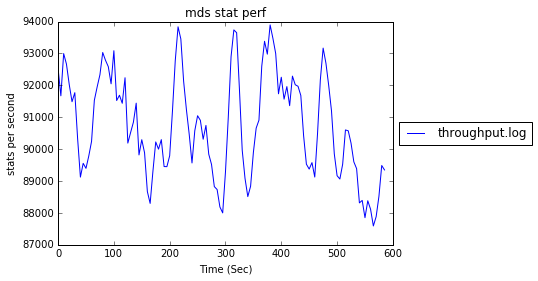

In [12]:
traces = glob.glob('results.single_client.pl3.04-22-2016_15-01-37.smoke.test.2/*.log')
plot_traces(list(traces), 'output')